<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220905_Life_Expectancy_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2021/01/06/life-expectancy-analysis-with-python/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.graph_objects as go
import plotly.express as px
from plotly.colors import n_colors
import seaborn as sns

import pandas_profiling
%matplotlib inline
from matplotlib import rc
import scipy.stats
from scipy.stats.mstats import winsorize

In [3]:
le = pd.read_csv('/content/drive/MyDrive/Ironhack/DBs/Life Expectancy Data.csv')

In [4]:
le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
le.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
le.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
le.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
cols = le.columns

In [9]:
cols = [i.lower() for i in cols]
cols

['country',
 'year',
 'status',
 'life expectancy ',
 'adult mortality',
 'infant deaths',
 'alcohol',
 'percentage expenditure',
 'hepatitis b',
 'measles ',
 ' bmi ',
 'under-five deaths ',
 'polio',
 'total expenditure',
 'diphtheria ',
 ' hiv/aids',
 'gdp',
 'population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'income composition of resources',
 'schooling']

In [10]:
colums = [i.replace(' ', '_') for i in cols]
cols = colums
cols

['country',
 'year',
 'status',
 'life_expectancy_',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles_',
 '_bmi_',
 'under-five_deaths_',
 'polio',
 'total_expenditure',
 'diphtheria_',
 '_hiv/aids',
 'gdp',
 'population',
 '_thinness__1-19_years',
 '_thinness_5-9_years',
 'income_composition_of_resources',
 'schooling']

In [11]:
i = '_bmi_'
if i.startswith('_'):
  print(i[1:])

bmi_


In [12]:
#cols.replace = {'life_expectancy_': 'life_expectancy', 'measels_':'measels', '_bmi_':'bmi', 'under-five_deaths_': 'under-five_deaths', 'diphteria_': 'diphteria', '_hiv/aids': 'hiv/aids',
#                '_thinnes__1-19_years':'thinnes_1-19_years', '_thinnes_5-9_years':'thinnes_5-9_years'}

In [13]:
cols = [i[1:] if i.startswith('_') else i for i in cols]

In [14]:
cols

['country',
 'year',
 'status',
 'life_expectancy_',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles_',
 'bmi_',
 'under-five_deaths_',
 'polio',
 'total_expenditure',
 'diphtheria_',
 'hiv/aids',
 'gdp',
 'population',
 'thinness__1-19_years',
 'thinness_5-9_years',
 'income_composition_of_resources',
 'schooling']

In [15]:
cols = [i[:-1] if i.endswith('_') else i for i in cols]
cols

['country',
 'year',
 'status',
 'life_expectancy',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles',
 'bmi',
 'under-five_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'hiv/aids',
 'gdp',
 'population',
 'thinness__1-19_years',
 'thinness_5-9_years',
 'income_composition_of_resources',
 'schooling']

In [16]:
le.columns = cols
le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

In [17]:
le.rename (columns = {'thinness__1-19_years':'thinness_1-19_years'}, inplace=True)
le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

In [18]:
(le.isnull().sum()/le.shape[0])*100

country                             0.000000
year                                0.000000
status                              0.000000
life_expectancy                     0.340368
adult_mortality                     0.340368
infant_deaths                       0.000000
alcohol                             6.603131
percentage_expenditure              0.000000
hepatitis_b                        18.822328
measles                             0.000000
bmi                                 1.157250
under-five_deaths                   0.000000
polio                               0.646698
total_expenditure                   7.692308
diphtheria                          0.646698
hiv/aids                            0.000000
gdp                                15.248468
population                         22.191967
thinness_1-19_years                 1.157250
thinness_5-9_years                  1.157250
income_composition_of_resources     5.684139
schooling                           5.547992
dtype: flo

In [19]:
le.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [20]:
le.groupby('country').apply(lambda x: x.interpolate(method='linear'))

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [21]:
y2015 = le[le.year == 2015]
y2015['alcohol'].fillna(y2015['alcohol'].median())

0       0.010
16      4.600
32      5.285
48      5.285
64      5.285
        ...  
2858    5.285
2874    5.285
2890    5.285
2906    5.285
2922    5.285
Name: alcohol, Length: 183, dtype: float64

In [22]:
imputed_data = []
for year in list(le.year.unique()):
  year_data = le[le.year == year].copy()
  for col in list(year_data.columns)[3:]:
    year_data[col] = year_data[col].fillna(year_data[col].dropna().median()).copy()
  imputed_data.append(year_data)
le = pd.concat(imputed_data).copy()

In [23]:
le.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_1-19_years                0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

In [30]:
num_cols = [i for i in range(1,len(le.columns))]
print(le.columns, num_cols)

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object') [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [33]:
col_dict = dict(zip(le.columns[3:], [i for i in range(1,len(le.columns[3:]))]))
col_dict

{'life_expectancy': 1,
 'adult_mortality': 2,
 'infant_deaths': 3,
 'alcohol': 4,
 'percentage_expenditure': 5,
 'hepatitis_b': 6,
 'measles': 7,
 'bmi': 8,
 'under-five_deaths': 9,
 'polio': 10,
 'total_expenditure': 11,
 'diphtheria': 12,
 'hiv/aids': 13,
 'gdp': 14,
 'population': 15,
 'thinness_1-19_years': 16,
 'thinness_5-9_years': 17,
 'income_composition_of_resources': 18}

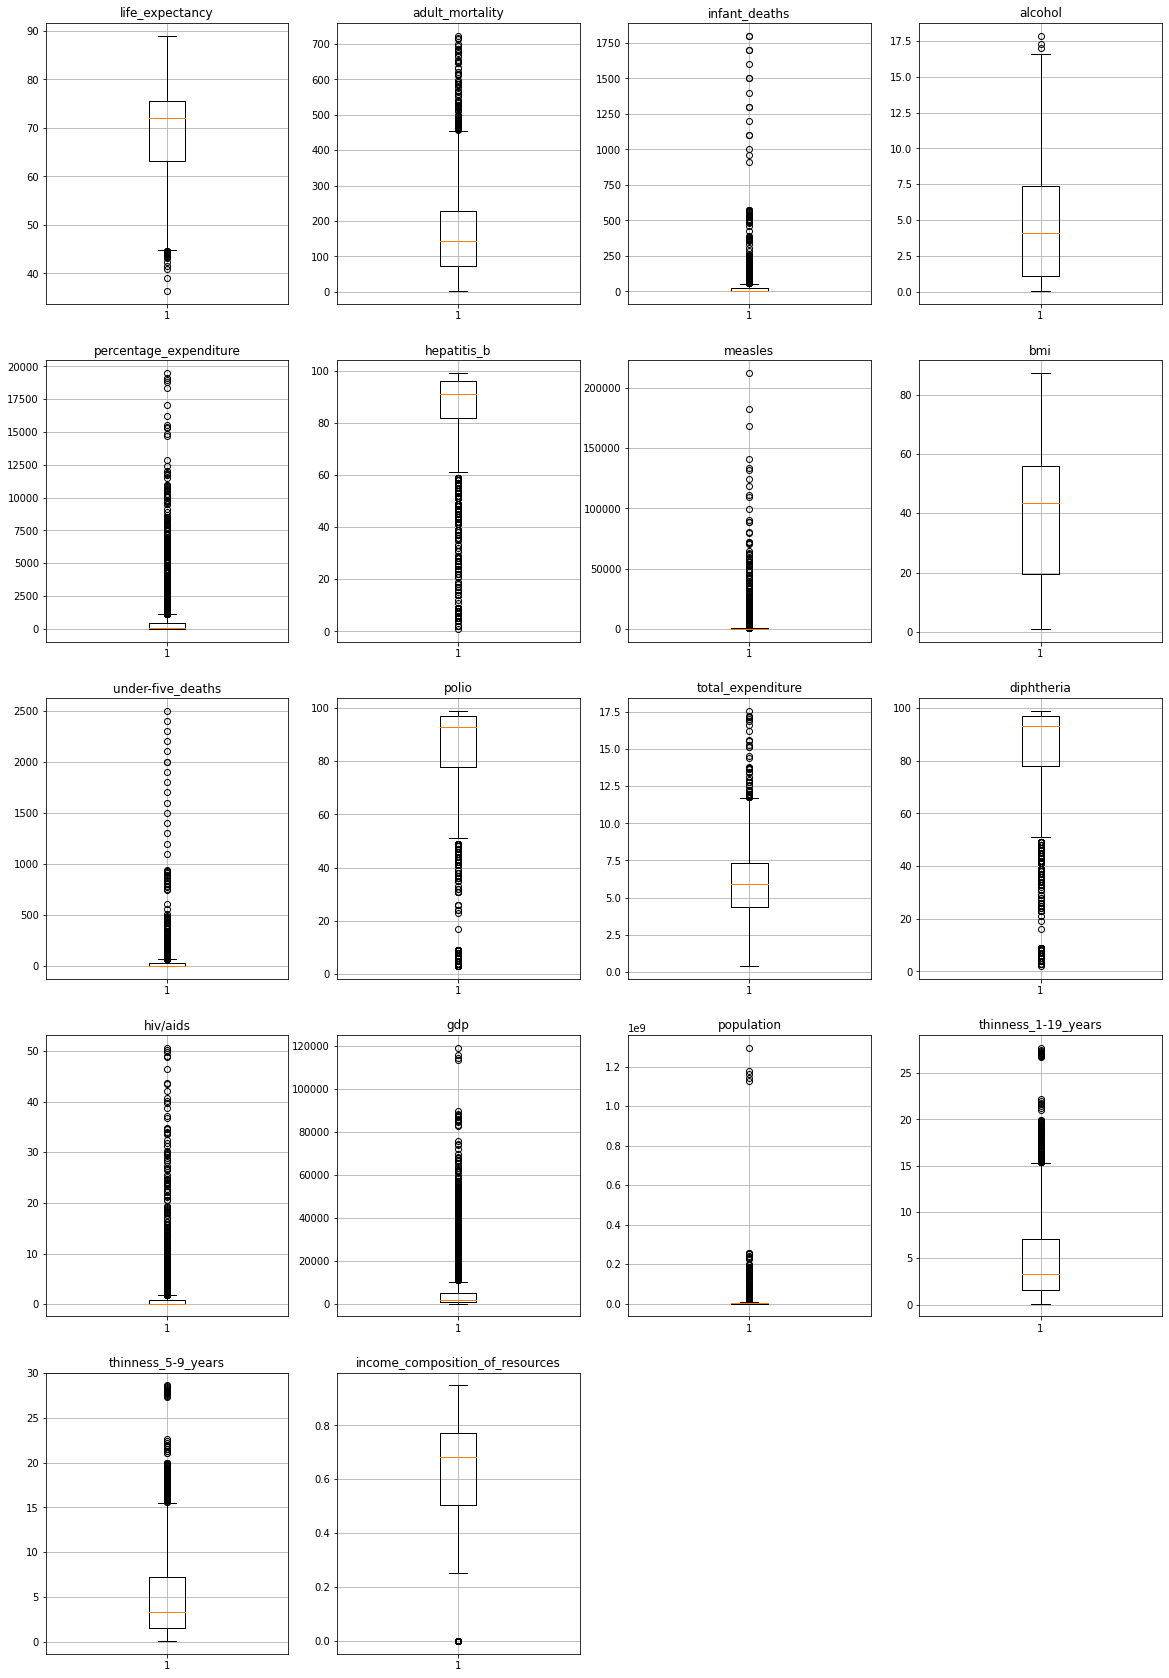

In [38]:
fig = plt.figure(figsize=(20,30))

for var, i in col_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(le[var])
  plt.title(var)
  plt.grid(True)

plt.show()

In [43]:
le = le[le.infant_deaths < 1001]
le = le[le.measles < 1001]
le = le[le['under-five_deaths']<1001]

In [44]:
le.drop('bmi', axis=1, inplace=True)

In [45]:
le['log_percentage_expenditure'] = np.log(le['percentage_expenditure'])
le['log_population'] = np.log(le['population'])
le['log_gdp'] = np.log(le['gdp'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [46]:
le['log_percentage_expenditure']

16      5.899829
32          -inf
48          -inf
64          -inf
80          -inf
          ...   
2825    6.470735
2841    3.881758
2857    3.086521
2873        -inf
2905        -inf
Name: log_percentage_expenditure, Length: 2413, dtype: float64

In [47]:
le = le.replace([np.inf, -np.inf], 0)

In [48]:
le.log_percentage_expenditure

16      5.899829
32      0.000000
48      0.000000
64      0.000000
80      0.000000
          ...   
2825    6.470735
2841    3.881758
2857    3.086521
2873    0.000000
2905    0.000000
Name: log_percentage_expenditure, Length: 2413, dtype: float64

In [49]:
le['winz_life_expectancy'] = winsorize(le.life_expectancy, (0.05, 0))
le['winz_adult_mortality'] = winsorize(le.adult_mortality,(0, 0.04))
le['winz_alcohol'] = winsorize(le.alcohol, (0.0, 0.01))

In [52]:
le['winz_hepatitis_b'] = winsorize(le['hepatitis_b'], (0.20,0.0))
le['winz_polio'] = winsorize(le['polio'], (0.20,0.0))
le['winz_total_expenditure'] = winsorize(le['total_expenditure'], (0.0,0.02))
le['winz_diphtheria'] = winsorize(le['diphtheria'], (0.11,0.0))
le['winz_hiv/aids'] = winsorize(le['hiv/aids'], (0.0,0.21))
le['winz_thinness_1-19_years'] = winsorize(le['thinness_1-19_years'], (0.0,0.04))
le['winz_thinness_5-9_years'] = winsorize(le['thinness_5-9_years'], (0.0,0.04))
le['winz_income_composition_of_resources'] = winsorize(le['income_composition_of_resources'], (0.05,0.0))
le['winz_schooling'] = winsorize(le['schooling'], (0.03,0.01))

In [59]:
le.columns[21:]

Index(['log_percentage_expenditure', 'log_population', 'log_gdp',
       'winz_life_expectancy', 'winz_adult_mortality', 'winz_alcohol',
       'winz_hepatitis_b', 'winz_polio', 'winz_total_expenditure',
       'winz_diphtheria', 'winz_hiv/aids', 'winz_thinness_1-19_years',
       'winz_thinness_5-9_years', 'winz_income_composition_of_resources',
       'winz_schooling'],
      dtype='object')

In [60]:
le.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2413 entries, 16 to 2905
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               2413 non-null   object 
 1   year                                  2413 non-null   int64  
 2   status                                2413 non-null   object 
 3   life_expectancy                       2413 non-null   float64
 4   adult_mortality                       2413 non-null   float64
 5   infant_deaths                         2413 non-null   int64  
 6   alcohol                               2413 non-null   float64
 7   percentage_expenditure                2413 non-null   float64
 8   hepatitis_b                           2413 non-null   float64
 9   measles                               2413 non-null   int64  
 10  under-five_deaths                     2413 non-null   int64  
 11  polio           

In [65]:
col_dict_winz = dict(zip(le.columns[3:], [i for i in range(1, len(le.columns[3:]))]))
col_dict_winz

{'life_expectancy': 1,
 'adult_mortality': 2,
 'infant_deaths': 3,
 'alcohol': 4,
 'percentage_expenditure': 5,
 'hepatitis_b': 6,
 'measles': 7,
 'under-five_deaths': 8,
 'polio': 9,
 'total_expenditure': 10,
 'diphtheria': 11,
 'hiv/aids': 12,
 'gdp': 13,
 'population': 14,
 'thinness_1-19_years': 15,
 'thinness_5-9_years': 16,
 'income_composition_of_resources': 17,
 'schooling': 18,
 'log_percentage_expenditure': 19,
 'log_population': 20,
 'log_gdp': 21,
 'winz_life_expectancy': 22,
 'winz_adult_mortality': 23,
 'winz_alcohol': 24,
 'winz_hepatitis_b': 25,
 'winz_polio': 26,
 'winz_total_expenditure': 27,
 'winz_diphtheria': 28,
 'winz_hiv/aids': 29,
 'winz_thinness_1-19_years': 30,
 'winz_thinness_5-9_years': 31,
 'winz_income_composition_of_resources': 32}

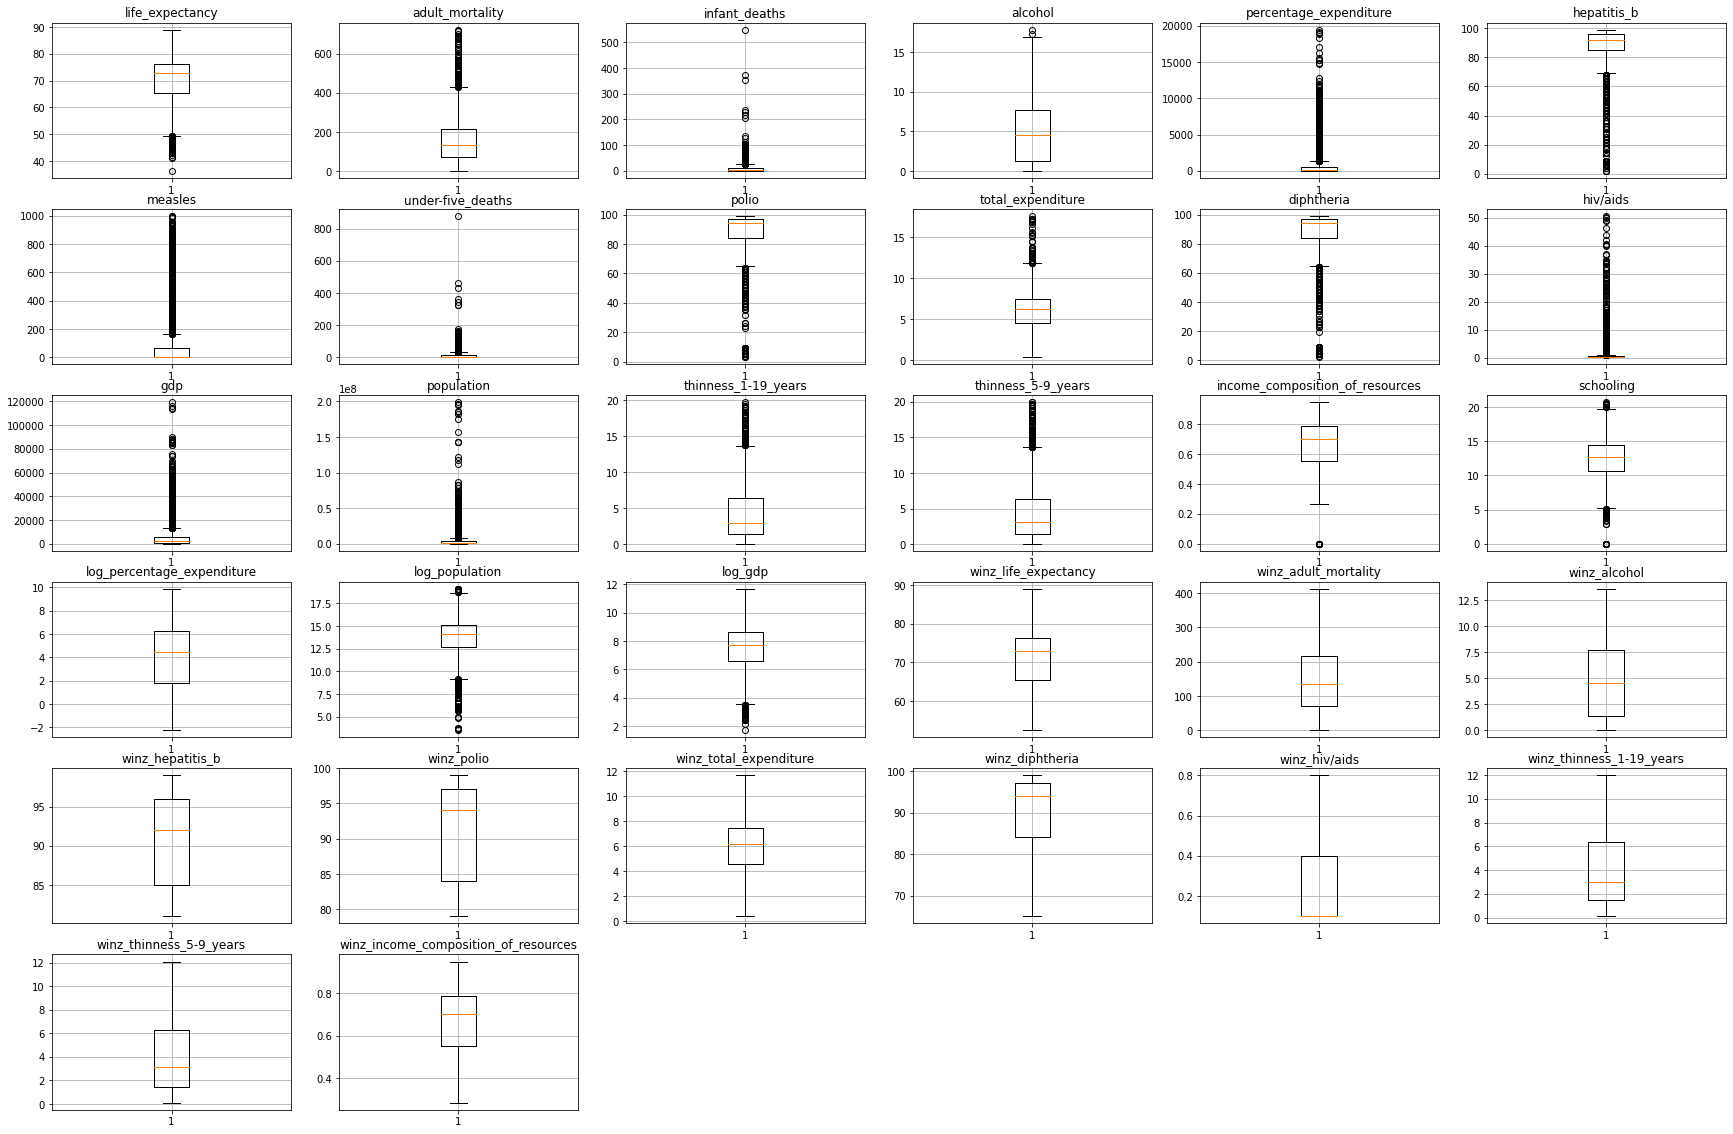

In [67]:
fig = plt.figure(figsize=(30,20))

for var, i in col_dict_winz.items():
  plt.subplot(6,6,i)
  plt.boxplot(le[var])
  plt.title(var)
  plt.ylabel('')
  plt.grid(True)

plt.show()          

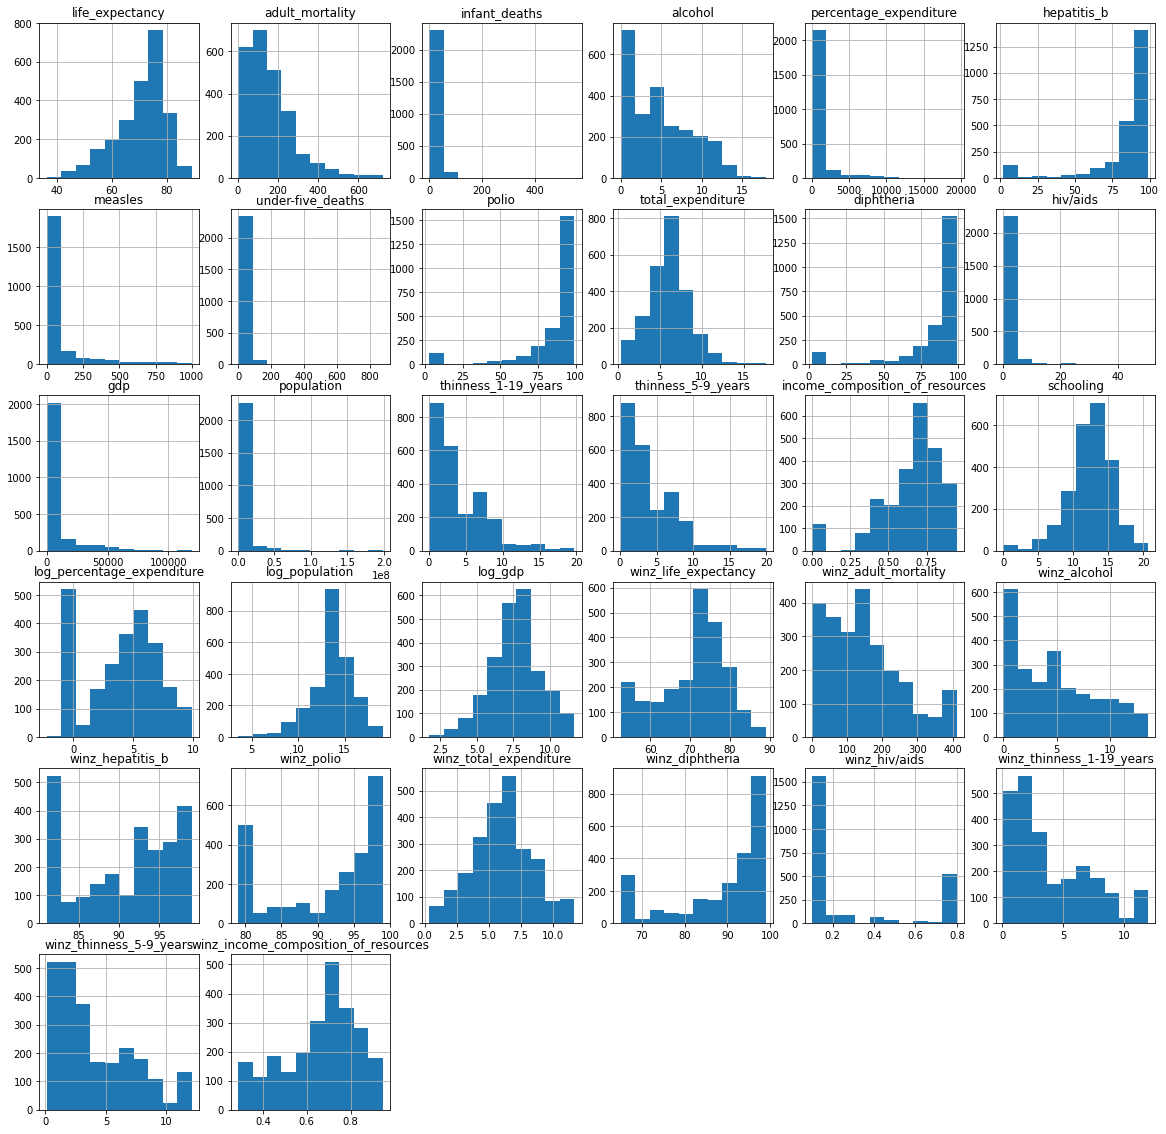

In [68]:
fig = plt.figure(figsize=(20,20))
for var, i in col_dict_winz.items():
  plt.subplot(6,6,i)
  plt.hist(le[var])
  plt.title(var)
  plt.ylabel('')
  plt.grid(True)
plt.show()

In [72]:
columnas = ['Year', 'Country', 'Status','winz_Life_expectancy','winz_Adult_mortality','Infant_deaths','winz_Alcohol',
            'log_Percentage_expenditure','winz_Hepatitis_B','Measles','Under-five_deaths','winz_Polio',
            'winz_Total_expenditure','winz_Diphtheria','winz_HIV/AIDS','log_GDP','log_Population',
            'winz_Thinness_1-19_years','winz_Thinness_5-9_years','winz_Income_composition_of_resources',
            'winz_Schooling']

In [73]:
columnas = [i.lower() for i in columnas]
columnas

['year',
 'country',
 'status',
 'winz_life_expectancy',
 'winz_adult_mortality',
 'infant_deaths',
 'winz_alcohol',
 'log_percentage_expenditure',
 'winz_hepatitis_b',
 'measles',
 'under-five_deaths',
 'winz_polio',
 'winz_total_expenditure',
 'winz_diphtheria',
 'winz_hiv/aids',
 'log_gdp',
 'log_population',
 'winz_thinness_1-19_years',
 'winz_thinness_5-9_years',
 'winz_income_composition_of_resources',
 'winz_schooling']

In [74]:
life_exp = le[columnas]
life_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2413 entries, 16 to 2905
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   year                                  2413 non-null   int64  
 1   country                               2413 non-null   object 
 2   status                                2413 non-null   object 
 3   winz_life_expectancy                  2413 non-null   float64
 4   winz_adult_mortality                  2413 non-null   float64
 5   infant_deaths                         2413 non-null   int64  
 6   winz_alcohol                          2413 non-null   float64
 7   log_percentage_expenditure            2413 non-null   float64
 8   winz_hepatitis_b                      2413 non-null   float64
 9   measles                               2413 non-null   int64  
 10  under-five_deaths                     2413 non-null   int64  
 11  winz_polio      

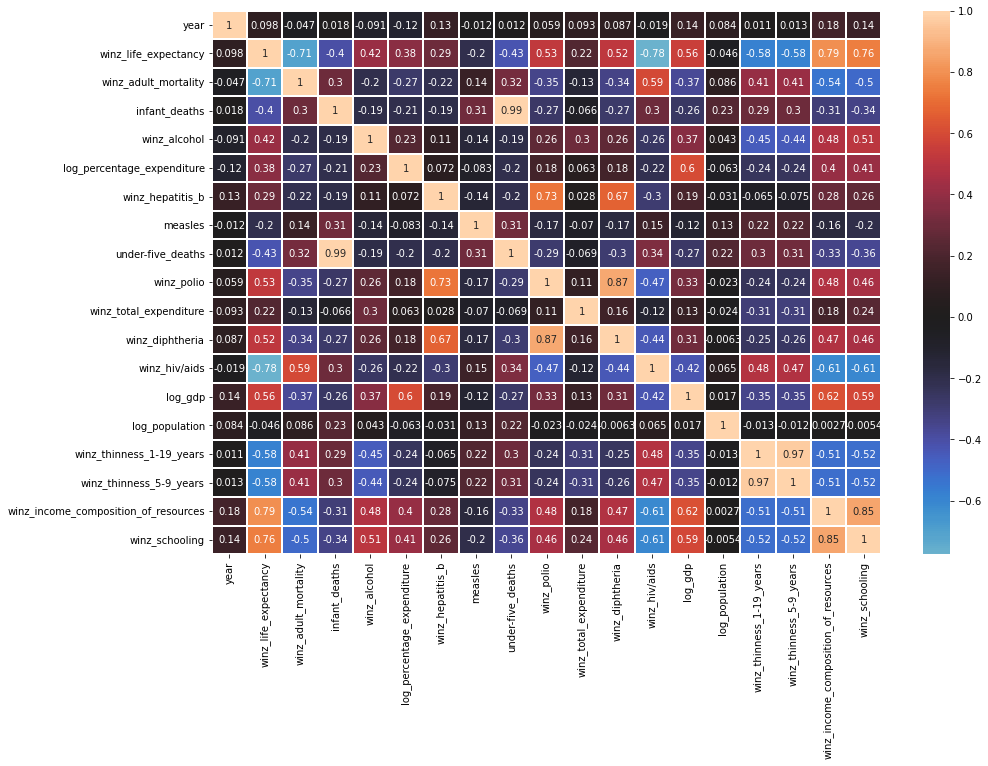

In [76]:
plt.figure(figsize=(15,10))
sns.heatmap(life_exp.corr(), annot=True, linewidth=1, center=0)
plt.show()

In [82]:
status_life_exp = le.groupby(by='status').mean().reset_index().sort_values('winz_life_expectancy', ascending=False).reset_index(drop=True)
plt.figure(figsize=(15,10))
fig = px.bar(status_life_exp, x='status', y='winz_life_expectancy', color='winz_life_expectancy')
fig.update_layout(
    title='Life expectancy according to status',
    xaxis_title='Status',
    yaxis_title='Average life expectancy',
    font=dict(family='Courier New', size=16, color='black')
)
fig.show()

<Figure size 1080x720 with 0 Axes>

In [85]:
life_year = le.groupby(by=['year', 'status']).mean().reset_index()
Developed = life_year.loc[life_year['status'] == 'Developed',:]
Developing = life_year.loc[life_year['status'] == 'Developing',:]

In [89]:
fig1 = go.Figure()
for template in ["plotly_dark"]:
    fig1.add_trace(go.Scatter(x=Developing['year'], y=Developing['winz_life_expectancy'],
                    mode='lines',
                    name='Developing',
                    marker_color='#f075c2'))
    fig1.add_trace(go.Scatter(x=Developed['year'], y=Developed['winz_life_expectancy'],
                    mode='lines',
                    name='Developed',
                    marker_color='#28d2c2'))
    fig1.update_layout(
    height=500,
    xaxis_title="Years",
    yaxis_title='Life expectancy in age',
    title_text='Average Life expectancy of Developing and Developed countries over the years',
    template=template)
fig1.show()